In [6]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [7]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1904Rockfish.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 164232 #s
wetweight = 1104.2 #g
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1904Rockfish.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


In [12]:
print(roi.roi_pars)

{'605': [608.0, 1, [[-10, -5], [-2, 3], [11, 20]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '609': [611.0, 5, [[-2, -1], [-0.5, 0.5], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '662': [664.0, 5, [[-2, -1], [-0.5, 0.5], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '1460': [1464.0, 15, [[-2, -1], [-0.7, 0.3], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]], '2614': [2617.0, 20, [[-2, -1], [-0.65, 0.2], [1, 2]], [[-2, -1], [-0.5, 0.5], [1, 2]]]}


C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
roi.set_sideband(605, 1, [[-10, -5], [-2, 3], [11, 20]])
roi.set_sideband(609, 5, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.5, 0.5], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.7, 0.3], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.65, 0.2], [1, 2]])

In [10]:
roi.find_peak_energies()

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

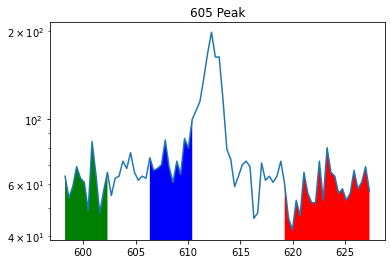

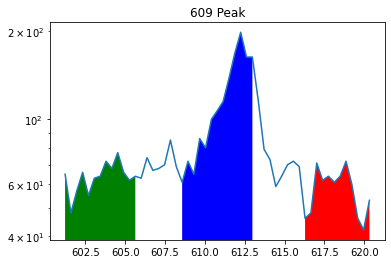

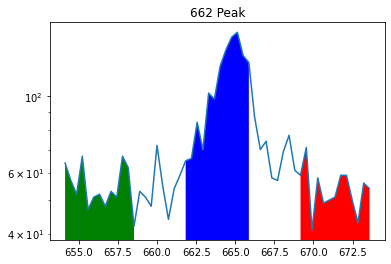

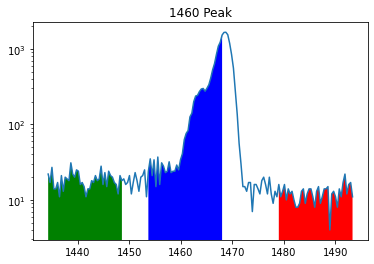

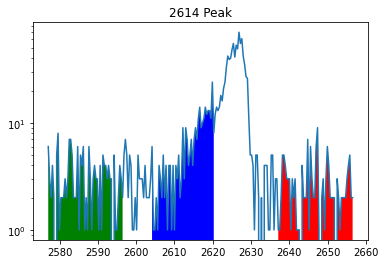

In [11]:
roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [ ]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

In [ ]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")